In [7]:
import numpy as np
import matplotlib.pyplot as plt
import os

In [8]:
### Fig 2:
def file_reader(fname_in,repeat):
    first = True
    for i_rep in range(repeat):
        fname = fname_in + "_i_%d.npz" % (i_rep)

        if os.path.exists(fname):
            npz_file = np.load(fname)
            succ_prob, p_list, Nrep = npz_file['succ_prob'], npz_file['p_list'], npz_file['N_ls']
            
            if first :
                first = False
                succ_prob_avg = np.zeros(len(p_list))
                Ntot = 0

            succ_prob_avg += succ_prob*Nrep
            Ntot += Nrep
    if not first:    
        return succ_prob_avg/Ntot, p_list, Ntot
    else:
        return 0,0,0

In [21]:
repeat = 25
Nl = 5
f2 = "pauli/7q_loss/" + "even_Nl_%d" % (Nl)
succ_prob, p_list, Ntot = file_reader(f2,repeat)

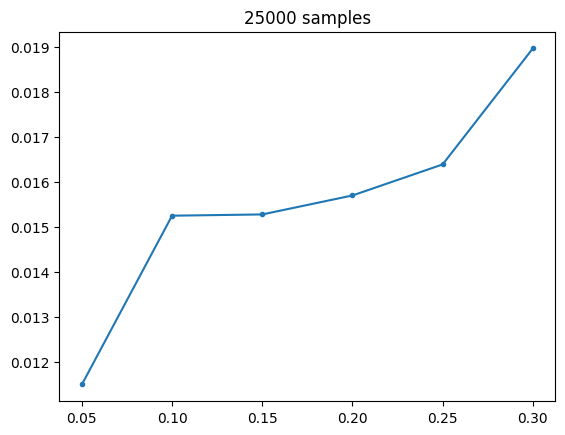

In [24]:
plt.plot(p_list, 1-succ_prob,'.-')
plt.title('25000 samples')
plt.savefig("logicalerror.pdf")

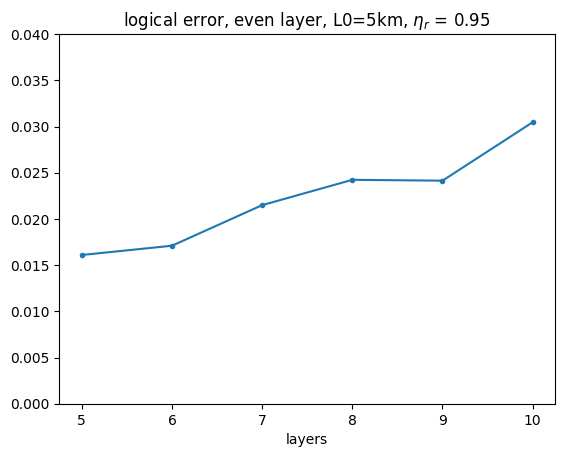

In [51]:
repeat = 20
Nl_list = [5,6,7,8,9,10]
log_err = []
for Nl in Nl_list:
    f2 = "pauli/7q_layers_L5/" + "even_Nl_%d" % (Nl)
    succ_prob, p_list, Ntot = file_reader(f2,repeat)
    log_err.append(succ_prob[0])
    
plt.plot(Nl_list, 1-np.array(log_err),'.-')
plt.ylim([0.0,0.04])
plt.xlabel('layers')
#plt.title('logical error, 20000 samples, 5% loss')
plt.title('logical error, even layer, L0=5km, $\eta_r$ = 0.95')
plt.savefig("logicalerrorVSlayers_L5.pdf")

[0.98325817]
[0.98118805]
[0.97695213]
[0.97295775]
[0.97165679]
[0.96837116]


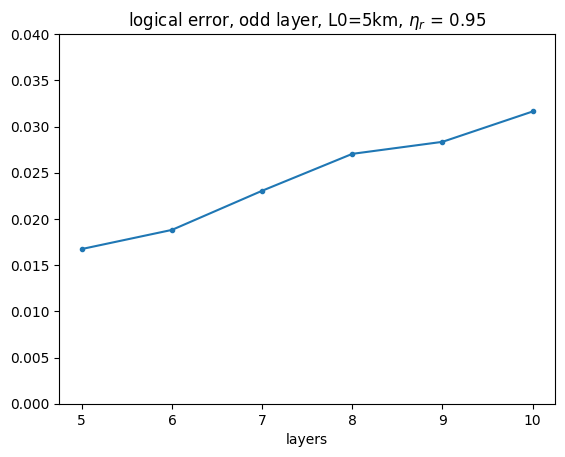

In [50]:
repeat = 20
Nl_list = [5,6,7,8,9,10]
log_err = []
p_r = 0.05
for Nl in Nl_list:
    #f2 = "pauli/7q_layers/" + "even_Nl_%d" % (Nl)
    
    f2 = "pauli/7q_layers_L5/" + "odd_p_%.2f_Nl_%d" % (p_r,Nl)
    succ_prob, p_list, Ntot = file_reader(f2,repeat)
    print(succ_prob)
    log_err.append(succ_prob[0])
    
plt.plot(Nl_list, 1-np.array(log_err),'.-')
plt.ylim([0.0,0.04])
plt.xlabel('layers')
plt.title('logical error, odd layer, L0=5km, $\eta_r$ = 0.95')
plt.savefig("logicalerrorVSlayers_odd_L5.pdf")

In [73]:
### Fig 2:
def file_reader_48q(fname_in,repeat):
    first = True
    for i_rep in range(repeat):
        fname = fname_in + "_i_%d.npz" % (i_rep)

        if os.path.exists(fname):
            npz_file = np.load(fname)
            succ_prob_X, p_list, Nrep = npz_file['succ_prob_X'], npz_file['p_list'], npz_file['N_ls']
            if first :
                first = False
                #succ_prob_avg = np.zeros(len(p_list))
                succ_prob_avg = np.zeros((len(p_list),np.size(succ_prob_X,1)))
                Ntot = np.zeros(np.size(succ_prob_X,1))
            for i_p in range(len(p_list)):
                for i_log in range(np.size(succ_prob_X,1)):
                    succ_prob_avg[i_p,i_log] += succ_prob_X[i_p,i_log]*Nrep[i_log]
                    Ntot[i_log] += Nrep[i_log]
    if not first:    
        return succ_prob_X, p_list, Nrep
    else:
        return 0,0,0

In [126]:
repeat = 60
#Nl_list = [5,6,7,8,9,10,12,14,15,16,18,20]
Nl_list = [2,4,6,8,10]
log_err = []
p_r = 0.05
for Nl in Nl_list:
    #f2 = "pauli/7q_layers/" + "even_Nl_%d" % (Nl)
    
    f2 = "pauli/48q_1/" + "odd_p_%.2f_Nl_%d" % (p_r,Nl)
    succ_prob_X, p_list, Ntot = file_reader_48q(f2,repeat)
    print(sum((succ_prob_X*Ntot)[0,:])/sum(Ntot))
    log_err.append(sum((succ_prob_X*Ntot)[0,:])/sum(Ntot))

0.9990499208267356
0.9990665577650726
0.998733058829413
0.9987161531279178
0.999


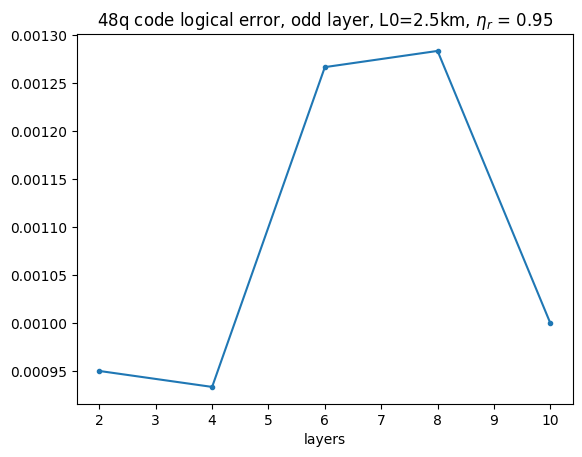

In [127]:
plt.plot(Nl_list, 1-np.array(log_err),'.-')
#plt.ylim([0.0,0.006])
#plt.yscale("log")
plt.xlabel('layers')
plt.title('48q code logical error, odd layer, L0=2.5km, $\eta_r$ = 0.95')
plt.savefig("48qlogicalerrorVSlayers_odd.pdf")